# Western States Prediction Evaluation

This notebook predicts average pace for the Western States

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('../../data/ws_pace_predictions.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Masters Men 1 (40-49),Male,11.804720,10.605747,9.668829,10.744975,10.744982,10.741196
1,1,Masters Men 1 (40-49),Male,12.242579,9.051986,9.301479,10.748605,10.737365,10.455589
2,2,Masters Men 2 (50-59),Male,10.913974,13.559780,9.043635,11.401750,11.402140,11.241669
3,3,Masters Men 2 (50-59),Male,11.844286,11.303364,9.881917,11.274727,11.274394,11.425228
4,4,Senior Women (23-39),Female,9.080386,9.710111,9.063317,8.450547,8.448198,8.442814


In [4]:
df = df.dropna()

In [5]:
df['pb_error'] = df.best_pb_prediction - df.query_pb
df['pb_error'] = df.pb_error.abs()
df['mean_error'] = df.mean_pb_average_pace - df.query_pb
df['mean_error'] = df.mean_error.abs()
df['cos_error'] = df.weighted_mean - df.query_pb
df['cos_error'] = df.cos_error.abs()
df['euc_error'] = df.euc_weighted_mean - df.query_pb
df['euc_error'] = df.euc_error.abs()

In [6]:
df.sort_values(by = 'weighted_mean')

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
97,97,Senior Men (23-39),Male,6.128450,6.449117,6.436022,6.087612,6.089448,6.090978,0.013095,0.361505,0.359669,0.358138
57,57,Senior Men (23-39),Male,5.695220,6.219578,5.779906,6.334347,6.334207,6.335359,0.439672,0.114769,0.114629,0.115781
58,58,Senior Men (23-39),Male,6.354409,6.219578,6.673321,6.578209,6.580368,6.584676,0.453743,0.358631,0.360790,0.365098
87,87,Senior Men (23-39),Male,6.906654,6.029859,6.500846,6.777237,6.776771,6.859733,0.470987,0.747378,0.746912,0.829874
89,89,Senior Men (23-39),Male,7.203445,8.564807,6.835530,6.858482,6.858401,6.550959,1.729277,1.706325,1.706406,2.013847
49,49,Senior Men (23-39),Male,7.017705,5.981049,6.659276,6.892771,6.891727,6.927823,0.678227,0.911723,0.910678,0.946775
86,86,Senior Men (23-39),Male,7.085094,6.029859,6.668801,6.938579,6.937959,6.901934,0.638942,0.908721,0.908100,0.872075
53,53,Masters Men 1 (40-49),Male,7.171352,7.630271,6.805076,6.951935,6.951581,6.644988,0.825195,0.678336,0.678691,0.985283
10,10,Senior Men (23-39),Male,6.729151,6.045749,6.385460,6.982490,6.984209,6.855210,0.339711,0.936740,0.938460,0.809460
50,50,Masters Men 1 (40-49),Male,7.236224,6.801945,6.866634,7.007996,7.008435,6.737447,0.064690,0.206051,0.206491,0.064498


# All

In [7]:
abestper = ((df.pb_error / df.query_pb) * 100).mean()
ameanper = ((df.mean_error / df.query_pb) * 100).mean()
acosper = ((df.cos_error / df.query_pb) * 100).mean()
aeucper = ((df.euc_error / df.query_pb) * 100).mean()

print('Fastest Case %: ', abestper)
print('Mean of Cases %: ',  ameanper)
print('Cosine Mean %:',  acosper)
print('Euclidean Mean %: ', aeucper)

Fastest Case %:  11.444261165925372
Mean of Cases %:  9.201500417984496
Cosine Mean %: 9.190575338058396
Euclidean Mean %:  9.155469352672926


In [8]:
len(df)

153

# Male

In [9]:
male = df[df.gender == 'Male']

In [10]:
len(male)

122

In [11]:
mbestper = ((male.pb_error / male.query_pb) * 100).mean()
mmeanper = ((male.mean_error / male.query_pb) * 100).mean()
mcosper = ((male.cos_error / male.query_pb) * 100).mean()
meucper = ((male.euc_error / male.query_pb) * 100).mean()

print('Fastest Case Percentage: ', mbestper)
print('Mean of Cases Percentage: ',  mmeanper)
print('Cosine Mean %:',  mcosper)
print('Euclidean Mean %: ', meucper)

Fastest Case Percentage:  12.068544227224123
Mean of Cases Percentage:  9.668969081846855
Cosine Mean %: 9.654456240786171
Euclidean Mean %:  9.620219907140914


# Female

In [12]:
female = df[df.gender == 'Female']

In [13]:
len(female)

31

In [14]:
fbestper = ((female.pb_error / female.query_pb) * 100).mean()
fmeanper = ((female.mean_error / female.query_pb) * 100).mean()
fcosper = ((female.cos_error / female.query_pb) * 100).mean()
feucper = ((female.euc_error / female.query_pb) * 100).mean()

print('Fastest Case Percentage: ', fbestper)
print('Mean of Cases Percentage: ',  fmeanper)
print('Cosine Mean %:',  fcosper)
print('Euclidean Mean %: ', feucper)

Fastest Case Percentage:  8.987405247265752
Mean of Cases Percentage:  7.361785031171385
Cosine Mean %: 7.364979527323264
Euclidean Mean %:  7.326451041540854


In [15]:
mean = [ameanper, mmeanper, fmeanper ]
best = [abestper, mbestper, fbestper]
w_mean = [acosper, mcosper, fcosper]
euc_mean =[aeucper, meucper, feucper]

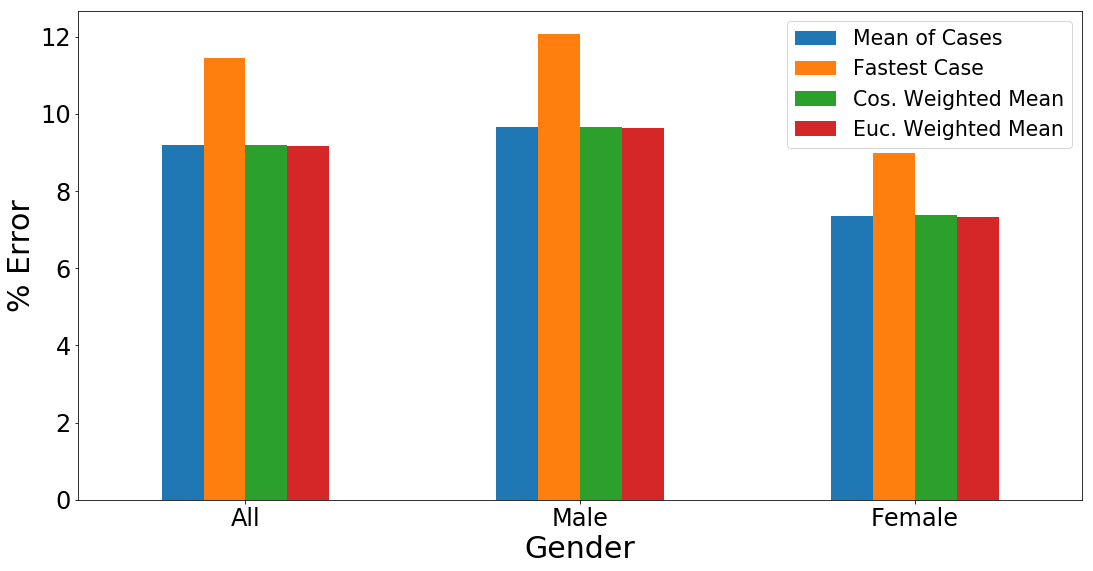

In [16]:
index = ['All', 'Male', 'Female']
gra_w = pd.DataFrame({'Euc. Weighted Mean': euc_mean, 'Fastest Case': best, 'Cos. Weighted Mean': w_mean, 'Mean of Cases': mean}, index=index)
gra_w = gra_w[['Mean of Cases', 'Fastest Case', 'Cos. Weighted Mean', 'Euc. Weighted Mean']]
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=24, rot=0)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Gender', fontsize = 30)
ax.legend(fontsize = 20.5)

There is a very similar trend to the UTMB predictions. The predictions for females is considerably
lower for each error metric. For males, the errors are just under 12% for fastest case and under
10% for mean of cases error. In comparison, the fastest case error for females is under 9% and
mean of cases error is under 8%. This is very encouraging for female runners, as the ratio of
females to males is far higher here than in the UTMB, as seen in Figure 3.9. In terms of the
mean of cases error, euclidean weighted mean produces the best result.


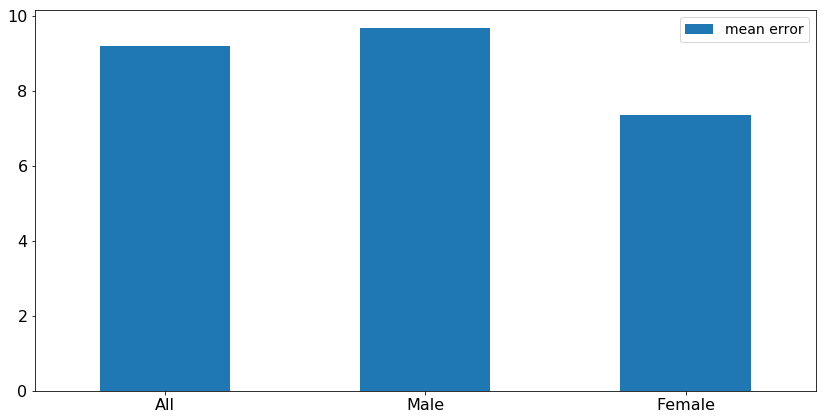

In [17]:
index = ['All', 'Male',  'Female']
gra = pd.DataFrame({'mean error': mean}, index=index)
ax = gra.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

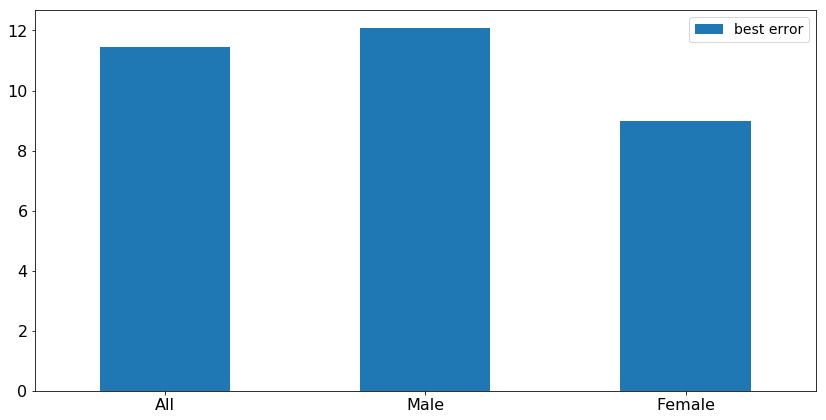

In [18]:
index = ['All', 'Male', 'Female']
gra2 = pd.DataFrame({'best error': best}, index=index)
ax = gra2.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

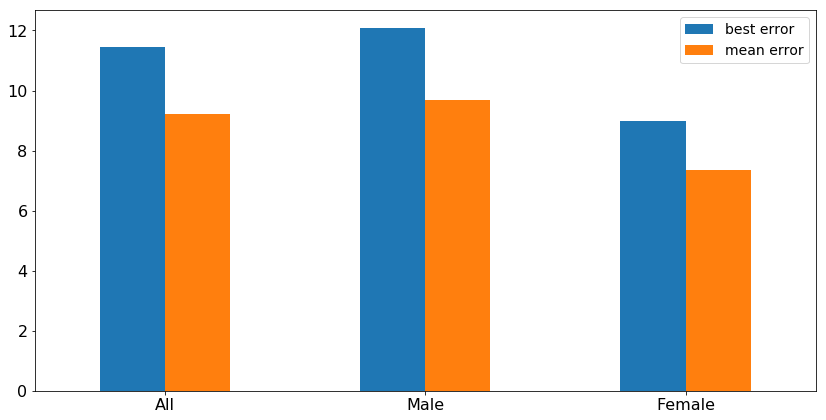

In [19]:
index = ['All', 'Male', 'Female']
gra1 = pd.DataFrame({'mean error': mean, 'best error': best}, index=index)
ax = gra1.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

# Categories

In [20]:
sen = df[df.category == 'Senior Men (23-39)']

mas = df[df.category == 'Masters Men 1 (40-49)']

mas2 = df[df.category == 'Masters Men 2 (50-59)']

mas3 = df[df.category == 'Masters Men 3 (60-69)']

wom1 = df[df.category == 'Masters Women 1 (40-49)']

wom2 = df[df.category == 'Masters Women 2 (50-59)']

senW = df[df.category == 'Senior Women (23-39)']

you = df[df.category == 'Youth Men (20-22)']

In [21]:
snrB = ((sen.pb_error / sen.query_pb) * 100).mean()
snrM = ((sen.mean_error / sen.query_pb) * 100).mean()
snrW = ((sen.cos_error / sen.query_pb) * 100).mean()
snrE = ((sen.euc_error / sen.query_pb) * 100).mean()

mas1B = ((mas.pb_error / mas.query_pb) * 100).mean()
mas1M = ((mas.mean_error / mas.query_pb) * 100).mean()
mas1W = ((mas.cos_error / mas.query_pb) * 100).mean()
mas1E = ((mas.euc_error / mas.query_pb) * 100).mean()

mas2B = ((mas2.pb_error / mas2.query_pb) * 100).mean()
mas2M = ((mas2.mean_error / mas2.query_pb) * 100).mean()
mas2W = ((mas2.cos_error / mas2.query_pb) * 100).mean()
mas2E = ((mas2.euc_error / mas2.query_pb) * 100).mean()

mas3B = ((mas3.pb_error / mas3.query_pb) * 100).mean()
mas3M = ((mas3.mean_error / mas3.query_pb) * 100).mean()
mas3W = ((mas3.cos_error / mas3.query_pb) * 100).mean()
mas3E = ((mas3.euc_error / mas3.query_pb) * 100).mean()

wom1B = ((wom1.pb_error / wom1.query_pb) * 100).mean()
wom1M = ((wom1.mean_error / wom1.query_pb) * 100).mean()
wom1W = ((wom1.cos_error / wom1.query_pb) * 100).mean()
wom1E = ((wom1.euc_error / wom1.query_pb) * 100).mean()

wom2B = ((wom2.pb_error / wom2.query_pb) * 100).mean()
wom2M = ((wom2.mean_error / wom2.query_pb) * 100).mean()
wom2W = ((wom2.cos_error / wom2.query_pb) * 100).mean()
wom2E = ((wom2.euc_error / wom2.query_pb) * 100).mean()

senWB = ((senW.pb_error / senW.query_pb) * 100).mean()
senWM = ((senW.mean_error / senW.query_pb) * 100).mean()
senWW = ((senW.cos_error / senW.query_pb) * 100).mean()
senWE = ((senW.euc_error / senW.query_pb) * 100).mean()

youB = ((you.pb_error / you.query_pb) * 100).mean()
youM = ((you.mean_error / you.query_pb) * 100).mean()
youW = ((you.cos_error / you.query_pb) * 100).mean()
youE = ((you.euc_error / you.query_pb) * 100).mean()


print('Senior Men Best Error:', snrB)
print('Senior Men Mean Error:', snrM)
print('Senior Men Cos Error:', snrW)
print('Senior Men Euc Error:', snrE)
print('Master 1 Best Error:', mas1B)
print('Master 1 Mean Error:', mas1M)
print('Master 1 Cos Error:', mas1W)
print('Master 1 Euc Error:', mas1E)
print('Master 2 Best Error:', mas2B)
print('Master 2 Mean Error:', mas2M)
print('Master 2 Cos Error:', mas2W)
print('Master 2 Euc Error:', mas2E)
print('Master 3 Best Error:', mas3B)
print('Master 3 Mean Error:', mas3M)
print('Master 3 Cos Error:', mas3W)
print('Master 3 Euc Error:', mas3E)
print('Master Women 1 Best Error:', wom1B)
print('Master Women 1 Mean Error:', wom1M)
print('Master Women 1 Cos Error:', wom1W)
print('Master Women 1 Euc Error:', wom1E)
print('Master Women 2 Best Error:', wom2B)
print('Master Women 2 Mean Error:', wom2M)
print('Master Women 2 Cos Error:', wom2W)
print('Master Women 2 Euc Error:', wom2E)
print('Senior Women Best Error:', senWB)
print('Senior Women Mean Error:', senWM)
print('Senior Women Cos Error:', senWW)
print('Senior Women Euc Error:', senWE)

Senior Men Best Error: 11.321010153453212
Senior Men Mean Error: 10.737437113193183
Senior Men Cos Error: 10.715313644439949
Senior Men Euc Error: 10.618441281098143
Master 1 Best Error: 10.96745874683795
Master 1 Mean Error: 8.665095061680635
Master 1 Cos Error: 8.65644505017659
Master 1 Euc Error: 8.912063492040387
Master 2 Best Error: 16.053601805217134
Master 2 Mean Error: 10.2994763189246
Master 2 Cos Error: 10.28240611389087
Master 2 Euc Error: 9.647560397772516
Master 3 Best Error: 12.343662633178111
Master 3 Mean Error: 7.731733568552379
Master 3 Cos Error: 7.7356457911898815
Master 3 Euc Error: 7.938769091563728
Master Women 1 Best Error: 8.921778907846798
Master Women 1 Mean Error: 7.723647701187041
Master Women 1 Cos Error: 7.703716049047813
Master Women 1 Euc Error: 7.788282018493715
Master Women 2 Best Error: 10.583920218159655
Master Women 2 Mean Error: 7.086454284224999
Master Women 2 Cos Error: 7.076463422221558
Master Women 2 Euc Error: 7.139709225156257
Senior Women B

In [22]:
mean1 = [snrM, mas1M, mas2M, mas3M, wom1M, wom2M, senWM]
best1 = [snrB, mas1B, mas2B, mas3B, wom1B, wom2B, senWB]

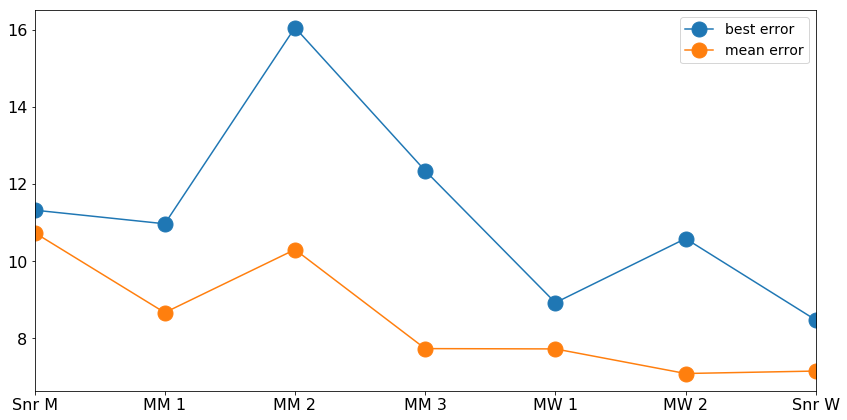

In [23]:
index = ['Snr M', 'MM 1', 'MM 2', 'MM 3', 'MW 1', 'MW 2', 'Snr W']
gra3 = pd.DataFrame({'mean error': mean1, 'best error': best1}, index=index)
ax = gra3.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Ability

In [24]:
g7 = df[(df.query_pb <= 7)]
g9 = df[(df.query_pb > 7) & (df.query_pb <=  9)]
g11 = df[(df.query_pb > 9) & (df.query_pb <= 11)]
g13 = df[(df.query_pb > 11) & (df.query_pb <= 13)]
g15 = df[(df.query_pb > 13)]

## Bin counts

In [25]:
g7count = g7.shape[0]
g9count = g9.shape[0]
g11count = g11.shape[0]
g13count = g13.shape[0]
g15count = g15.shape[0]

In [26]:
count = [g7count, g9count, g11count, g13count, g15count]

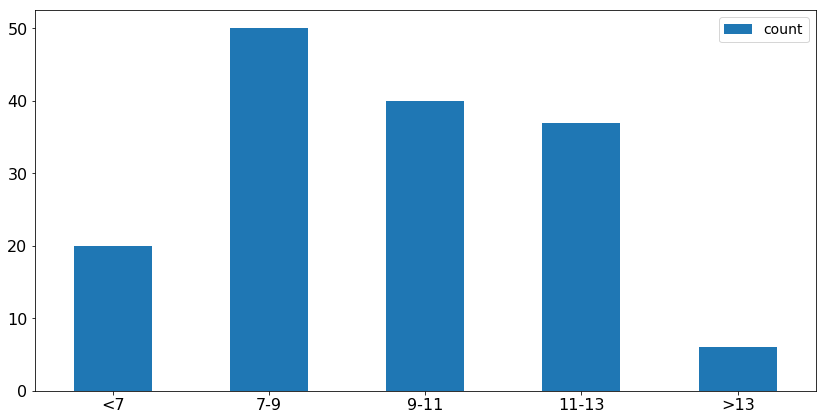

In [27]:
index = ['<7', '7-9', '9-11', '11-13', '>13']
gra7 = pd.DataFrame({'count': count}, index=index)
ax = gra7.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [28]:
g7B = ((g7.pb_error / g7.query_pb) * 100).mean()
g7M = ((g7.mean_error / g7.query_pb) * 100).mean()
g7W = ((g7.cos_error / g7.query_pb) * 100).mean()
g7E = ((g7.euc_error / g7.query_pb) * 100).mean()

g9B = ((g9.pb_error / g9.query_pb) * 100).mean()
g9M = ((g9.mean_error / g9.query_pb) * 100).mean()
g9W = ((g9.cos_error / g9.query_pb) * 100).mean()
g9E = ((g9.euc_error / g9.query_pb) * 100).mean()

g11B = ((g11.pb_error / g11.query_pb) * 100).mean()
g11M = ((g11.mean_error / g11.query_pb) * 100).mean()
g11W = ((g11.cos_error / g11.query_pb) * 100).mean()
g11E = ((g11.euc_error / g11.query_pb) * 100).mean()

g13B = ((g13.pb_error / g13.query_pb) * 100).mean()
g13M = ((g13.mean_error / g13.query_pb) * 100).mean()
g13W = ((g13.cos_error / g13.query_pb) * 100).mean()
g13E = ((g13.euc_error / g13.query_pb) * 100).mean()

g15B = ((g15.pb_error / g15.query_pb) * 100).mean()
g15M = ((g15.mean_error / g15.query_pb) * 100).mean()
g15W = ((g15.cos_error / g15.query_pb) * 100).mean()
g15E = ((g15.euc_error / g15.query_pb) * 100).mean()


In [29]:
mean2 = [g7M, g9M, g11M, g13M, g15M]
best2 = [g9B, g9B, g11B, g13B, g15B]
wei2 = [g9W, g9W, g11W, g13W, g15W]
euc2 = [g9E, g9E, g11E, g13E, g15E]

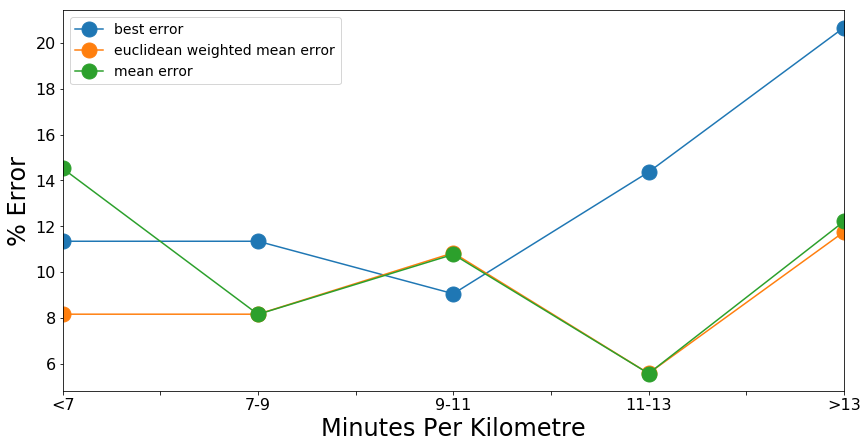

In [30]:
index = ['<7', '7-9', '9-11', '11-13', '>13']
gra4 = pd.DataFrame({'mean error': mean2, 'best error': best2, 'euclidean weighted mean error': euc2}, index=index)
ax = gra4.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('% Error', fontsize = 24)
ax.set_xlabel('Minutes Per Kilometre', fontsize = 24)
ax.legend(fontsize = 14)

# Male Ability

In [31]:
maleg7 = male[(male.query_pb <= 7)]
maleg9 = male[(male.query_pb > 7) & (male.query_pb <=  9)]
maleg11 = male[(male.query_pb > 9) & (male.query_pb <= 11)]
maleg13 = male[(male.query_pb > 11) & (male.query_pb <= 13)]
maleg15 = male[(male.query_pb > 13)]

## Bin Counts

In [32]:
maleg7count = maleg7.shape[0]
maleg9count = maleg9.shape[0]
maleg11count = maleg11.shape[0]
maleg13count = maleg13.shape[0]
maleg15count = maleg15.shape[0]

In [33]:
print(maleg7count)
print(maleg9count)
print(maleg11count)
print(maleg13count)
print(maleg15count)

19
32
31
34
6


In [34]:
count = [maleg7count, maleg9count, maleg11count, maleg13count, maleg15count]

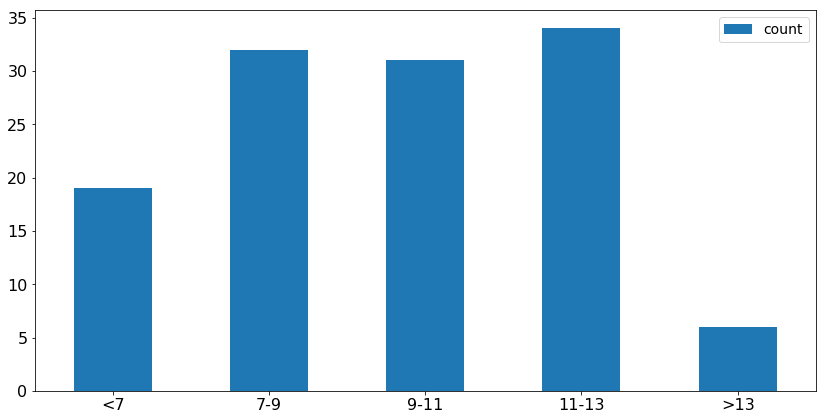

In [35]:
index = ['<7', '7-9', '9-11', '11-13', '>13']
gra7 = pd.DataFrame({'count': count}, index=index)
ax = gra7.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [36]:
maleg7B = ((maleg7.pb_error / maleg7.query_pb) * 100).mean()
maleg7M = ((maleg7.mean_error / maleg7.query_pb) * 100).mean()
maleg7W = ((maleg7.cos_error / maleg7.query_pb) * 100).mean()
maleg7E = ((maleg7.euc_error / maleg7.query_pb) * 100).mean()

maleg9B = ((maleg9.pb_error / maleg9.query_pb) * 100).mean()
maleg9M = ((maleg9.mean_error / maleg9.query_pb) * 100).mean()
maleg9W = ((maleg9.cos_error / maleg9.query_pb) * 100).mean()
maleg9E = ((maleg9.euc_error / maleg9.query_pb) * 100).mean()

maleg11B = ((maleg11.pb_error / maleg11.query_pb) * 100).mean()
maleg11M = ((maleg11.mean_error / maleg11.query_pb) * 100).mean()
maleg11W = ((maleg11.cos_error / maleg11.query_pb) * 100).mean()
maleg11E = ((maleg11.euc_error / maleg11.query_pb) * 100).mean()

maleg13B = ((maleg13.pb_error / maleg13.query_pb) * 100).mean()
maleg13M = ((maleg13.mean_error / maleg13.query_pb) * 100).mean()
maleg13W = ((maleg13.cos_error / maleg13.query_pb) * 100).mean()
maleg13E = ((maleg13.euc_error / maleg13.query_pb) * 100).mean()

maleg15B = ((maleg15.pb_error / maleg15.query_pb) * 100).mean()
maleg15M = ((maleg15.mean_error / maleg15.query_pb) * 100).mean()
maleg15W = ((maleg15.cos_error / maleg15.query_pb) * 100).mean()
maleg15E = ((maleg15.euc_error / maleg15.query_pb) * 100).mean()

print(maleg7B)
print(maleg7M)
print(maleg9B)
print(maleg9M)
print(maleg11B)
print(maleg11M)
print(maleg13B)
print(maleg13M)
print(maleg15B)
print(maleg15M)

7.188583132585517
14.049533701081188
13.856088347173833
10.49019961659604
9.48841414666071
10.96385513586691
13.948293471219026
4.819954185268169
20.666945420788
12.20479140378462


In [37]:
mean3 = [maleg7M, maleg9M, maleg11M, maleg13M, maleg15M]
best3 = [maleg9B, maleg9B, maleg11B, maleg13B, maleg15B]
wei3 = [maleg9W, maleg9W, maleg11W, maleg13W, maleg15W]
euc3 = [maleg9E, maleg9E, maleg11E, maleg13E, maleg15E]

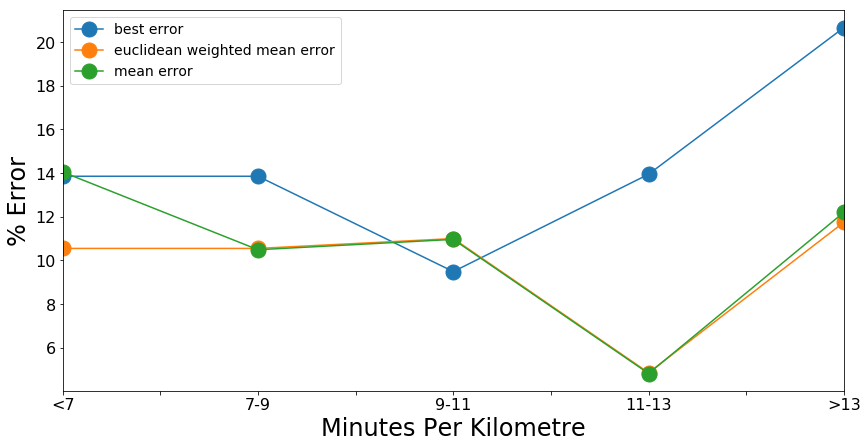

In [38]:
index = ['<7', '7-9', '9-11', '11-13', '>13']
gra4 = pd.DataFrame({'mean error': mean3, 'best error': best3, 'euclidean weighted mean error': euc3}, index=index)
ax = gra4.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('% Error', fontsize = 24)
ax.set_xlabel('Minutes Per Kilometre', fontsize = 24)
ax.legend(fontsize = 14)

# Female Ability

In [39]:
femaleg7 = female[(female.query_pb <= 7)]
femaleg9 = female[(female.query_pb > 7) & (female.query_pb <=  9)]
femaleg11 = female[(female.query_pb > 9) & (female.query_pb <= 11)]
femaleg13 = female[(female.query_pb > 11) & (female.query_pb <= 13)]
femaleg15 = female[(female.query_pb > 13)]

## Bin Counts

In [40]:
femaleg7count = femaleg7.shape[0]
femaleg9count = femaleg9.shape[0]
femaleg11count = femaleg11.shape[0]
femaleg13count = femaleg13.shape[0]
femaleg15count = femaleg15.shape[0]

In [41]:
print(femaleg7count)
print(femaleg9count)
print(femaleg11count)
print(femaleg13count)
print(femaleg15count)

1
18
9
3
0


In [42]:
count = [femaleg7count, femaleg9count, femaleg11count, femaleg13count, femaleg15count]

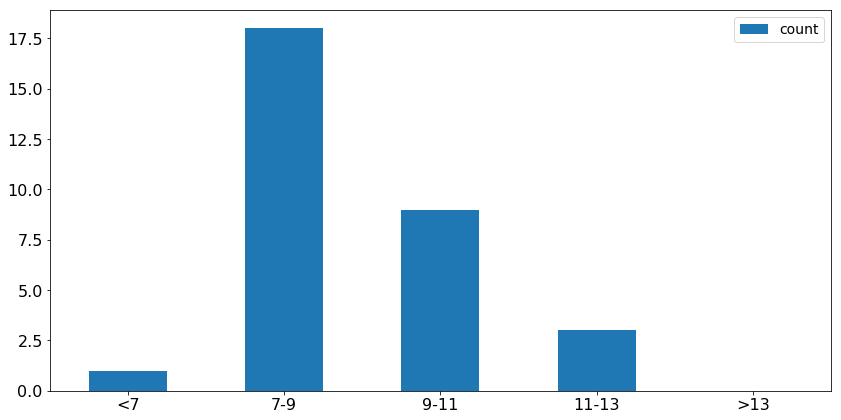

In [43]:
index = ['<7', '7-9', '9-11', '11-13', '>13']
gra7 = pd.DataFrame({'count': count}, index=index)
ax = gra7.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [44]:
femaleg7B = ((femaleg7.pb_error / femaleg7.query_pb) * 100).mean()
femaleg7M = ((femaleg7.mean_error / femaleg7.query_pb) * 100).mean()
femaleg7W = ((femaleg7.cos_error / femaleg7.query_pb) * 100).mean()
femaleg7E = ((femaleg7.euc_error / femaleg7.query_pb) * 100).mean()

femaleg9B = ((femaleg9.pb_error / femaleg9.query_pb) * 100).mean()
femaleg9M = ((femaleg9.mean_error / femaleg9.query_pb) * 100).mean()
femaleg9W = ((femaleg9.cos_error / femaleg9.query_pb) * 100).mean()
femaleg9E = ((femaleg9.euc_error / femaleg9.query_pb) * 100).mean()

femaleg11B = ((femaleg11.pb_error / femaleg11.query_pb) * 100).mean()
femaleg11M = ((femaleg11.mean_error / femaleg11.query_pb) * 100).mean()
femaleg11W = ((femaleg11.cos_error / femaleg11.query_pb) * 100).mean()
femaleg11E = ((femaleg11.euc_error / femaleg11.query_pb) * 100).mean()

femaleg13B = ((femaleg13.pb_error / femaleg13.query_pb) * 100).mean()
femaleg13M = ((femaleg13.mean_error / femaleg13.query_pb) * 100).mean()
femaleg13W = ((femaleg13.cos_error / femaleg13.query_pb) * 100).mean()
femaleg13E = ((femaleg13.euc_error / femaleg13.query_pb) * 100).mean()

femaleg15B = ((femaleg15.pb_error / femaleg15.query_pb) * 100).mean()
femaleg15M = ((femaleg15.mean_error / femaleg15.query_pb) * 100).mean()
femaleg15W = ((femaleg15.cos_error / femaleg15.query_pb) * 100).mean()
femaleg15E = ((femaleg15.euc_error / femaleg15.query_pb) * 100).mean()

print(femaleg7B)
print(femaleg7M)
print(femaleg9B)
print(femaleg9M)
print(femaleg11B)
print(femaleg11M)
print(femaleg13B)
print(femaleg13M)
print(femaleg15B)
print(femaleg15M)


30.003589518322705
23.432166810923732
6.868913844210578
3.9912269727876395
7.540706750402276
10.087297409406741
19.03305439916824
14.051802320183677
nan
nan


In [45]:
mean5 = [femaleg7M, femaleg9M, femaleg11M, femaleg13M, femaleg15M]
best5 = [femaleg9B, femaleg9B, femaleg11B, femaleg13B, femaleg15B]
wei5 = [femaleg9W, femaleg9W, femaleg11W, femaleg13W, femaleg15W]
euc5 = [femaleg9E, femaleg9E, femaleg11E, femaleg13E, femaleg15E]

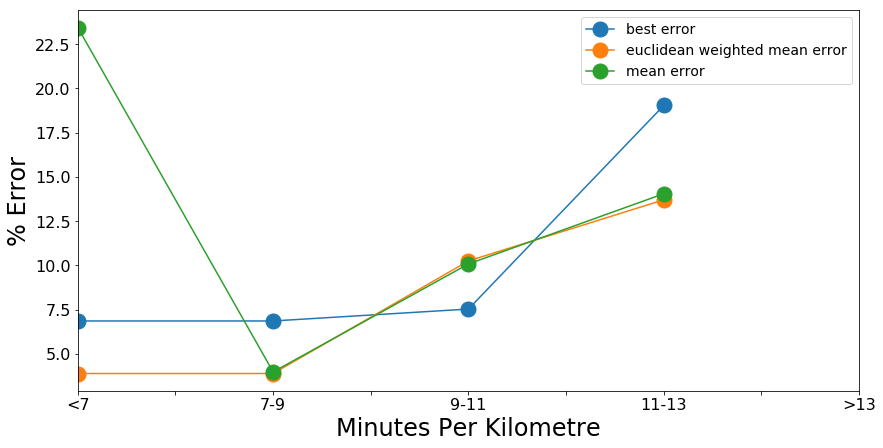

In [46]:
index = ['<7', '7-9', '9-11', '11-13', '>13']
gra4 = pd.DataFrame({'mean error': mean5, 'best error': best5, 'euclidean weighted mean error': euc5}, index=index)
ax = gra4.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('% Error', fontsize = 24)
ax.set_xlabel('Minutes Per Kilometre', fontsize = 24)
ax.legend(fontsize = 14)

# Males vs Females

In [47]:
mean4 = [femaleg7M, femaleg9M, femaleg11M, femaleg13M, femaleg15M]
best4 = [femaleg7B, femaleg9B, femaleg11B, femaleg13B, femaleg15B]
euc4 = [femaleg7E, femaleg9E, femaleg11E, femaleg13E, femaleg15E]

In [48]:
mean3 = [maleg7M, maleg9M, maleg11M, maleg13M, maleg15M]
best3 = [maleg7B, maleg9B, maleg11B, maleg13B, maleg15B]
euc3 = [maleg7E, maleg9E, maleg11E, maleg13E, maleg15E]

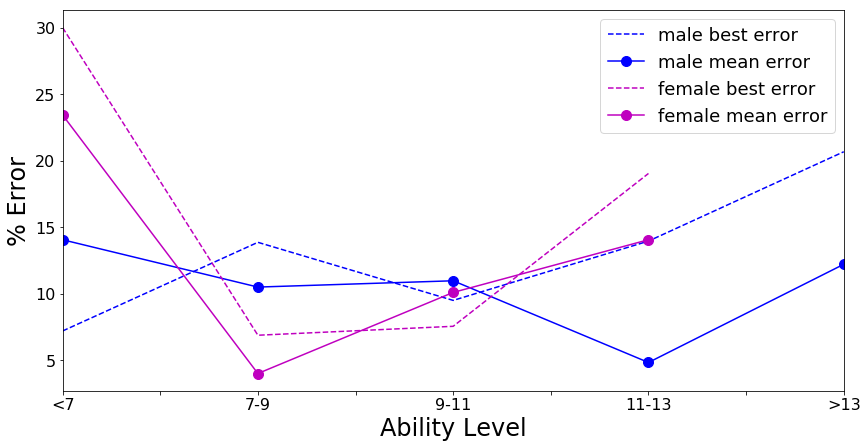

In [49]:
index = ['<7', '7-9', '9-11', '11-13', '>13']
gra5 = pd.DataFrame({'male mean error': mean3, 'male best error': best3}, index=index)
gra15 = pd.DataFrame({'female mean error': mean4, 'female best error': best4}, index=index)
styles1 = ['b--','bo-']
styles2 = ['m--','mo-']
fig, ax = plt.subplots()
gra5.plot(style=styles1, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
gra15.plot(style=styles2, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
ax.set_ylabel('% Error', fontsize = 24)
ax.set_xlabel('Ability Level', fontsize = 24)
ax.legend(fontsize = 18)
#testdataframe2.plot(style=styles2, ax=ax)

# Categorical Ability

## Senior Men Ability

In [50]:
sg9 = sen[(sen.query_pb <= 9)]
sg11 = sen[(sen.query_pb > 9) & (sen.query_pb <= 11)]
sg13 = sen[(sen.query_pb > 11) & (sen.query_pb <= 13)]
sg15 = sen[(sen.query_pb > 13) & (sen.query_pb <= 15)]
sg17 = sen[(sen.query_pb > 15) & (sen.query_pb <= 17)]
sg19 = sen[(sen.query_pb > 17)]

### Bin counts

In [51]:
sg9count = sg9.shape[0]
sg11count = sg11.shape[0]
sg13count = sg13.shape[0]
sg15count = sg15.shape[0]
sg17count = sg17.shape[0]
sg19count = sg19.shape[0]

In [52]:
count2 = [sg9count, sg11count, sg13count, sg15count, sg17count, sg19count]

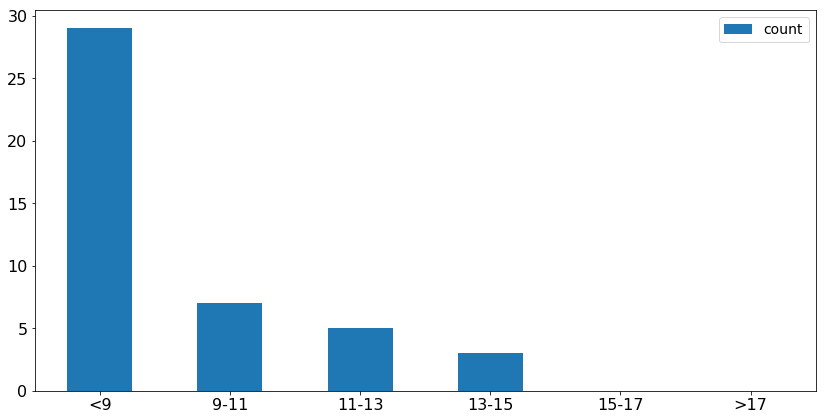

In [53]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count2}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [55]:
sg9B = sqrt(mean_squared_error(sg9.query_pb, sg9.best_pb_prediction))
sg9M = sqrt(mean_squared_error(sg9.query_pb, sg9.mean_pb_average_pace))

sg11B = sqrt(mean_squared_error(sg11.query_pb, sg11.best_pb_prediction))
sg11M = sqrt(mean_squared_error(sg11.query_pb, sg11.mean_pb_average_pace))

sg13B = sqrt(mean_squared_error(sg13.query_pb, sg13.best_pb_prediction))
sg13M = sqrt(mean_squared_error(sg13.query_pb, sg13.mean_pb_average_pace))

sg15B = sqrt(mean_squared_error(sg15.query_pb, sg15.best_pb_prediction))
sg15M = sqrt(mean_squared_error(sg15.query_pb, sg15.mean_pb_average_pace))

# sg17B = sqrt(mean_squared_error(sg17.query_pb, sg17.best_pb_prediction))
# sg17M = sqrt(mean_squared_error(sg17.query_pb, sg17.mean_pb_average_pace))

# sg19B = sqrt(mean_squared_error(sg19.query_pb, sg19.best_pb_prediction))
# sg19M = sqrt(mean_squared_error(sg19.query_pb, sg19.mean_pb_average_pace))


print('Sen U9 Best Error:', sg9B)
print('Sen U9 Mean Error:', sg9M)
print('Sen 9-11 Best Error:', sg11B)
print('Sen 9-11 Mean Error:', sg11M)
print('Sen 11-13 Best Error:', sg13B)
print('Sen 11-13 Mean Error:', sg13M)
print('Sen 13-15 Best Error:', sg15B)
print('Sen 13-15 Mean Error:', sg15M)
# print('Sen 15-17 Best Error:', sg17B)
# print('Sen 15-17 Mean Error:', sg17M)
# print('Sen O17 Best Error:', sg19B)
# print('Sen 017 Mean Error:', sg19M)

Sen U9 Best Error: 0.9676816587282102
Sen U9 Mean Error: 1.1454959062028027
Sen 9-11 Best Error: 1.4877187214011685
Sen 9-11 Mean Error: 0.9221652774637306
Sen 11-13 Best Error: 1.3877955744184824
Sen 11-13 Mean Error: 0.6206565404938119
Sen 13-15 Best Error: 2.814414469435903
Sen 13-15 Mean Error: 1.4951672462041166


In [56]:
mean5 = [sg9M, sg11M, sg13M, sg15M]
best5 = [sg9B, sg11B, sg13B, sg15B]

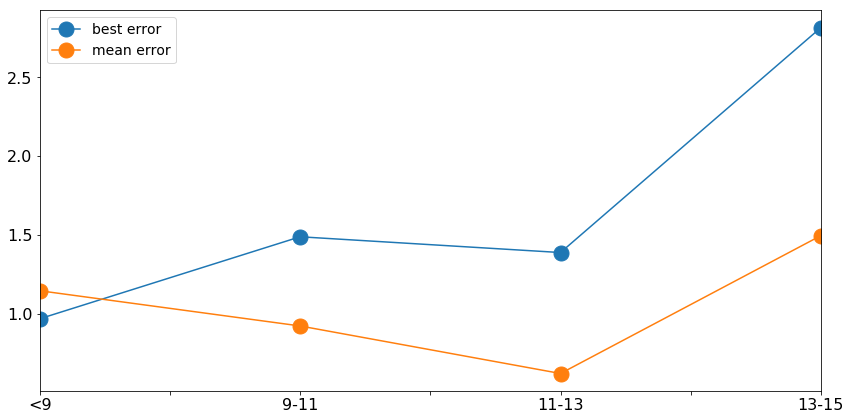

In [57]:
index = ['<9', '9-11', '11-13', '13-15']
gra12 = pd.DataFrame({'mean error': mean5, 'best error': best5}, index=index)
ax = gra12.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 1 Ability

In [58]:
mg9 = mas[(mas.query_pb <= 9)]
mg11 = mas[(mas.query_pb > 9) & (mas.query_pb <= 11)]
mg13 = mas[(mas.query_pb > 11) & (mas.query_pb <= 13)]
mg15 = mas[(mas.query_pb > 13) & (mas.query_pb <= 15)]
mg17 = mas[(mas.query_pb > 15) & (mas.query_pb <= 17)]
mg19 = mas[(mas.query_pb > 17)]

### Bin counts

In [59]:
mg9count = mg9.shape[0]
mg11count = mg11.shape[0]
mg13count = mg13.shape[0]
mg15count = mg15.shape[0]
mg17count = mg17.shape[0]
mg19count = mg19.shape[0]

In [60]:
count3 = [mg9count, mg11count, mg13count, mg15count, mg17count, mg19count]

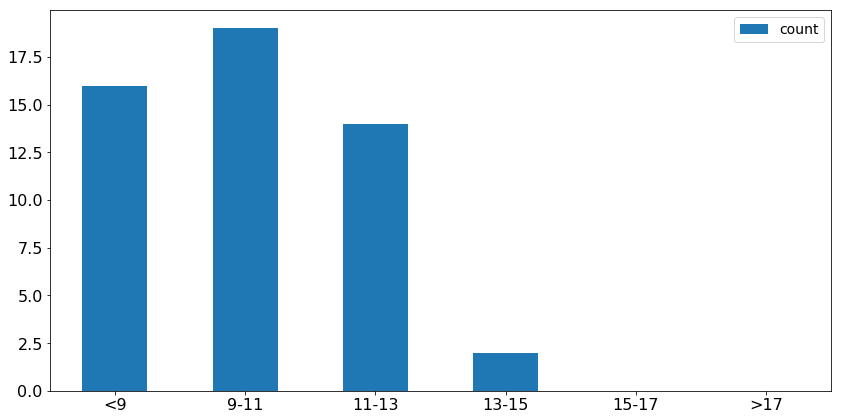

In [61]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [62]:
mg9B = sqrt(mean_squared_error(mg9.query_pb, mg9.best_pb_prediction))
mg9M = sqrt(mean_squared_error(mg9.query_pb, mg9.mean_pb_average_pace))

mg11B = sqrt(mean_squared_error(mg11.query_pb, mg11.best_pb_prediction))
mg11M = sqrt(mean_squared_error(mg11.query_pb, mg11.mean_pb_average_pace))

mg13B = sqrt(mean_squared_error(mg13.query_pb, mg13.best_pb_prediction))
mg13M = sqrt(mean_squared_error(mg13.query_pb, mg13.mean_pb_average_pace))

mg15B = sqrt(mean_squared_error(mg15.query_pb, mg15.best_pb_prediction))
mg15M = sqrt(mean_squared_error(mg15.query_pb, mg15.mean_pb_average_pace))

# mg17B = sqrt(mean_squared_error(mg17.query_pb, mg17.best_pb_prediction))
# mg17M = sqrt(mean_squared_error(mg17.query_pb, mg17.mean_pb_average_pace))

# mg19B = sqrt(mean_squared_error(mg19.query_pb, mg19.best_pb_prediction))
# mg19M = sqrt(mean_squared_error(mg19.query_pb, mg19.mean_pb_average_pace))


print('Mas U9 Best Error:', mg9B)
print('Mas U9 Mean Error:', mg9M)
print('Mas 9-11 Best Error:', mg11B)
print('Mas 9-11 Mean Error:', mg11M)
print('Mas 11-13 Best Error:', mg13B)
print('Mas 11-13 Mean Error:', mg13M)
print('Mas 13-15 Best Error:', mg15B)
print('Mas 13-15 Mean Error:', mg15M)
# print('Mas 15-17 Best Error:', mg17B)
# print('Mas 15-17 Mean Error:', mg17M)
# print('Mas O17 Best Error:', mg19B)
# print('Mas 017 Mean Error:', mg19M)

Mas U9 Best Error: 1.0201057910461222
Mas U9 Mean Error: 0.7834012333803438
Mas 9-11 Best Error: 1.311498676181628
Mas 9-11 Mean Error: 1.329047878259773
Mas 11-13 Best Error: 1.9339486105013213
Mas 11-13 Mean Error: 0.6282632081856896
Mas 13-15 Best Error: 2.8244267174802578
Mas 13-15 Mean Error: 1.7182243152719268


In [63]:
mean6 = [mg9M, mg11M, mg13M, mg15M]
best6 = [mg9B, mg11B, mg13B, mg15B]

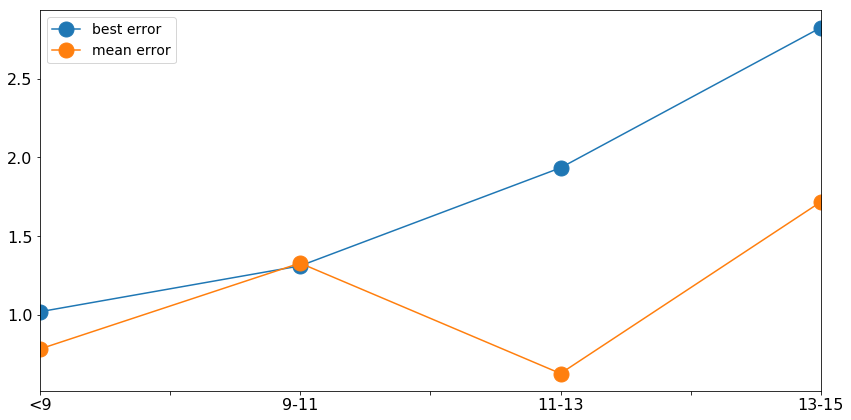

In [64]:
index = ['<9', '9-11', '11-13', '13-15']
gra13 = pd.DataFrame({'mean error': mean6, 'best error': best6}, index=index)
ax = gra13.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 2 Ability

In [65]:
m2g9 = mas2[(mas2.query_pb <= 9)]
m2g11 = mas2[(mas2.query_pb > 9) & (mas2.query_pb <= 11)]
m2g13 = mas2[(mas2.query_pb > 11) & (mas2.query_pb <= 13)]
m2g15 = mas2[(mas2.query_pb > 13) & (mas2.query_pb <= 15)]
m2g17 = mas2[(mas2.query_pb > 15) & (mas2.query_pb <= 17)]
m2g19 = mas2[(mas2.query_pb > 17)]

### Bin counts

In [66]:
m2g9count = m2g9.shape[0]
m2g11count = m2g11.shape[0]
m2g13count = m2g13.shape[0]
m2g15count = m2g15.shape[0]
m2g17count = m2g17.shape[0]
m2g19count = m2g19.shape[0]

In [67]:
count3 = [m2g9count, m2g11count, m2g13count, m2g15count, m2g17count, m2g19count]

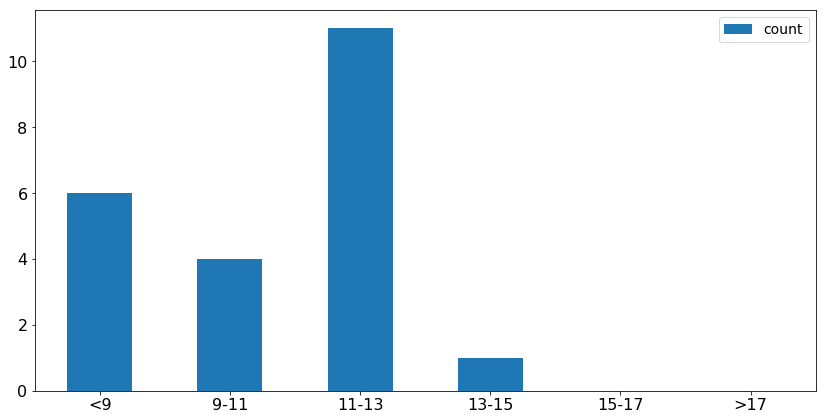

In [68]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [69]:
m2g9B = sqrt(mean_squared_error(m2g9.query_pb, m2g9.best_pb_prediction))
m2g9M = sqrt(mean_squared_error(m2g9.query_pb, m2g9.mean_pb_average_pace))

m2g11B = sqrt(mean_squared_error(m2g11.query_pb, m2g11.best_pb_prediction))
m2g11M = sqrt(mean_squared_error(m2g11.query_pb, m2g11.mean_pb_average_pace))

m2g13B = sqrt(mean_squared_error(m2g13.query_pb, m2g13.best_pb_prediction))
m2g13M = sqrt(mean_squared_error(m2g13.query_pb, m2g13.mean_pb_average_pace))

m2g15B = sqrt(mean_squared_error(m2g15.query_pb, m2g15.best_pb_prediction))
m2g15M = sqrt(mean_squared_error(m2g15.query_pb, m2g15.mean_pb_average_pace))

# m2g17B = sqrt(mean_squared_error(m2g17.query_pb, m2g17.best_pb_prediction))
# m2g17M = sqrt(mean_squared_error(m2g17.query_pb, m2g17.mean_pb_average_pace))

# m2g19B = sqrt(mean_squared_error(m2g19.query_pb, m2g19.best_pb_prediction))
# m2g19M = sqrt(mean_squared_error(m2g19.query_pb, m2g19.mean_pb_average_pace))


print('Mas2 U9 Best Error:', m2g9B)
print('Mas2 U9 Mean Error:', m2g9M)
print('Mas2 9-11 Best Error:', m2g11B)
print('Mas2 9-11 Mean Error:', m2g11M)
print('Mas2 11-13 Best Error:', m2g13B)
print('Mas2 11-13 Mean Error:', m2g13M)
print('Mas2 13-15 Best Error:', m2g15B)
print('Mas2 13-15 Mean Error:', m2g15M)
# print('Mas2 15-17 Best Error:', m2g17B)
# print('Mas2 15-17 Mean Error:', m2g17M)
# print('Mas2 O17 Best Error:', m2g19B)
# print('Mas2 017 Mean Error:', m2g19M)

Mas2 U9 Best Error: 1.7244731242135616
Mas2 U9 Mean Error: 2.0308862091243185
Mas2 9-11 Best Error: 1.4873408304746887
Mas2 9-11 Mean Error: 1.255272026941995
Mas2 11-13 Best Error: 2.0260484654611166
Mas2 11-13 Mean Error: 0.9619921999054263
Mas2 13-15 Best Error: 4.516145057780069
Mas2 13-15 Mean Error: 2.158030225737976


In [70]:
mean7 = [m2g9M, m2g11M, m2g13M, m2g15M]
best7 = [m2g9B, m2g11B, m2g13B, m2g15B]

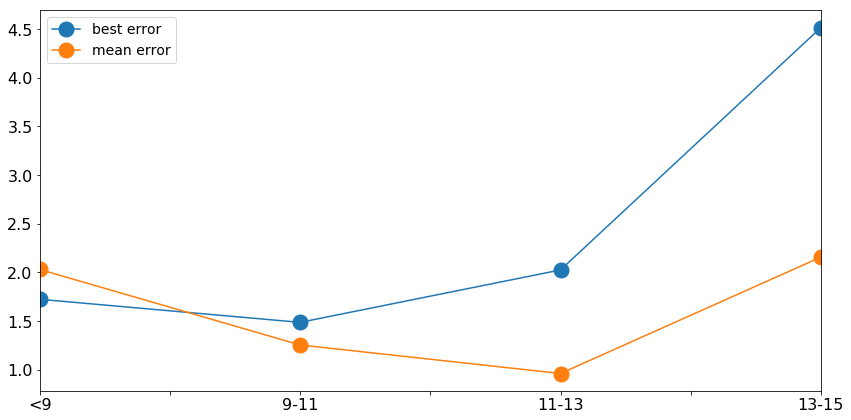

In [71]:
index = ['<9', '9-11', '11-13', '13-15']
gra14 = pd.DataFrame({'mean error': mean7, 'best error': best7}, index=index)
ax = gra14.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 3 Ability

In [72]:
m3g9 = mas3[(mas3.query_pb <= 9)]
m3g11 = mas3[(mas3.query_pb > 9) & (mas3.query_pb <= 11)]
m3g13 = mas3[(mas3.query_pb > 11) & (mas3.query_pb <= 13)]
m3g15 = mas3[(mas3.query_pb > 13) & (mas3.query_pb <= 15)]
m3g17 = mas3[(mas3.query_pb > 15) & (mas3.query_pb <= 17)]
m3g19 = mas3[(mas3.query_pb > 17)]

### Bin counts

In [73]:
m3g9count = m3g9.shape[0]
m3g11count = m3g11.shape[0]
m3g13count = m3g13.shape[0]
m3g15count = m3g15.shape[0]
m3g17count = m3g17.shape[0]
m3g19count = m3g19.shape[0]

In [74]:
count4 = [m3g9count, m3g11count, m3g13count, m3g15count, m3g17count, m3g19count]

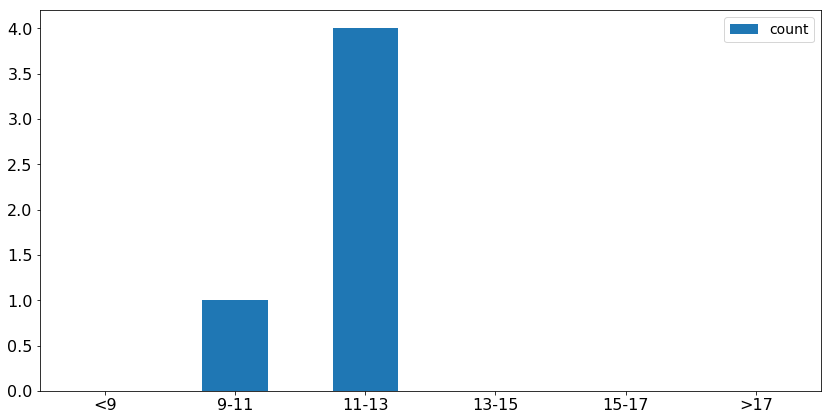

In [75]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count4}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [77]:
#m3g9B = sqrt(mean_squared_error(m3g9.query_pb, m3g9.best_pb_prediction))
#m3g9M = sqrt(mean_squared_error(m3g9.query_pb, m3g9.mean_pb_average_pace))

m3g11B = sqrt(mean_squared_error(m3g11.query_pb, m3g11.best_pb_prediction))
m3g11M = sqrt(mean_squared_error(m3g11.query_pb, m3g11.mean_pb_average_pace))

m3g13B = sqrt(mean_squared_error(m3g13.query_pb, m3g13.best_pb_prediction))
m3g13M = sqrt(mean_squared_error(m3g13.query_pb, m3g13.mean_pb_average_pace))

# m3g15B = sqrt(mean_squared_error(m3g15.query_pb, m3g15.best_pb_prediction))
# m3g15M = sqrt(mean_squared_error(m3g15.query_pb, m3g15.mean_pb_average_pace))

# m3g17B = sqrt(mean_squared_error(m3g17.query_pb, m3g17.best_pb_prediction))
# m3g17M = sqrt(mean_squared_error(m3g17.query_pb, m3g17.mean_pb_average_pace))

#m3g19B = sqrt(mean_squared_error(m3g19.query_pb, m3g19.best_pb_prediction))
#m3g19M = sqrt(mean_squared_error(m3g19.query_pb, m3g19.mean_pb_average_pace))


#print('Mas3 U9 Best Error:', m3g9B)
#print('Mas3 U9 Mean Error:', m3g9M)
print('Mas3 9-11 Best Error:', m3g11B)
print('Mas3 9-11 Mean Error:', m3g11M)
print('Mas3 11-13 Best Error:', m3g13B)
print('Mas3 11-13 Mean Error:', m3g13M)
# print('Mas3 13-15 Best Error:', m3g15B)
# print('Mas3 13-15 Mean Error:', m3g15M)
# print('Mas3 15-17 Best Error:', m3g17B)
# print('Mas3 15-17 Mean Error:', m3g17M)
#print('Mas3 O17 Best Error:', m3g19B)
#print('Mas3 017 Mean Error:', m3g19M)

Mas3 9-11 Best Error: 0.6473756624824798
Mas3 9-11 Mean Error: 1.8477358762488851
Mas3 11-13 Best Error: 1.9795393205391119
Mas3 11-13 Mean Error: 0.7760652742673994


In [78]:
mean8 = [m3g11M, m3g13M]
best8 = [m3g11B, m3g13B]

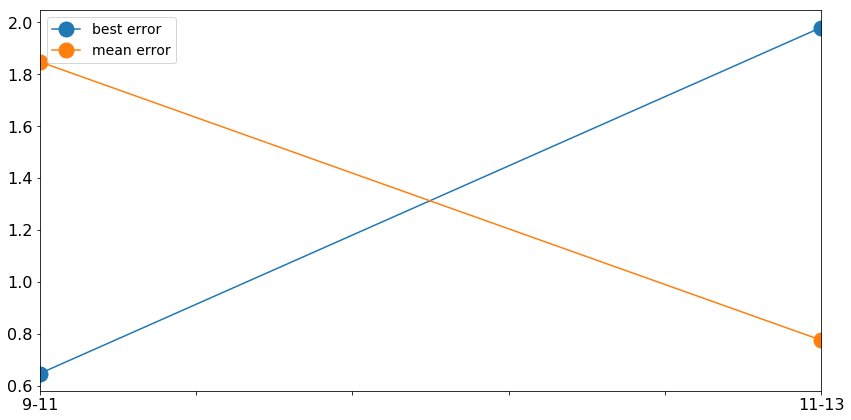

In [79]:
index = ['9-11', '11-13']
gra15 = pd.DataFrame({'mean error': mean8, 'best error': best8}, index=index)
ax = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 1 Ability

In [80]:
w1g9 = wom1[(wom1.query_pb <= 9)]
w1g11 = wom1[(wom1.query_pb > 9) & (wom1.query_pb <= 11)]
w1g13 = wom1[(wom1.query_pb > 11) & (wom1.query_pb <= 13)]
w1g15 = wom1[(wom1.query_pb > 13) & (wom1.query_pb <= 15)]
w1g17 = wom1[(wom1.query_pb > 15) & (wom1.query_pb <= 17)]
w1g19 = wom1[(wom1.query_pb > 17)]

### Bin counts

In [81]:
w1g9count = w1g9.shape[0]
w1g11count = w1g11.shape[0]
w1g13count = w1g13.shape[0]
w1g15count = w1g15.shape[0]
w1g17count = w1g17.shape[0]
w1g19count = w1g19.shape[0]

In [82]:
count5 = [w1g9count, w1g11count, w1g13count, w1g15count, w1g17count, w1g19count]

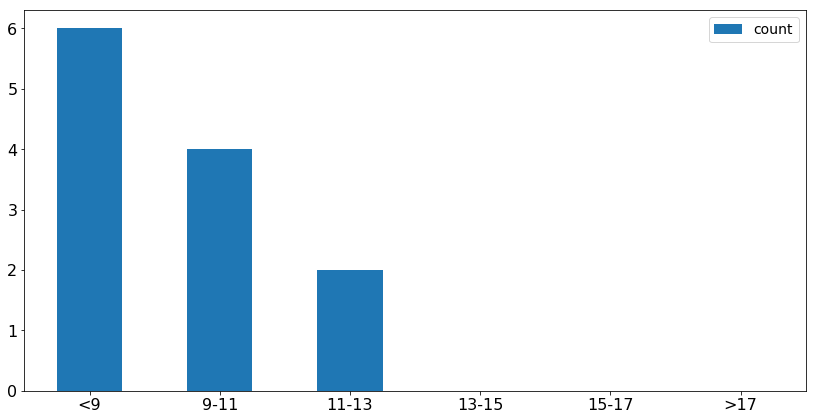

In [83]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count5}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [85]:
w1g9B = sqrt(mean_squared_error(w1g9.query_pb, w1g9.best_pb_prediction))
w1g9M = sqrt(mean_squared_error(w1g9.query_pb, w1g9.mean_pb_average_pace))

w1g11B = sqrt(mean_squared_error(w1g11.query_pb, w1g11.best_pb_prediction))
w1g11M = sqrt(mean_squared_error(w1g11.query_pb, w1g11.mean_pb_average_pace))

w1g13B = sqrt(mean_squared_error(w1g13.query_pb, w1g13.best_pb_prediction))
w1g13M = sqrt(mean_squared_error(w1g13.query_pb, w1g13.mean_pb_average_pace))

# w1g15B = sqrt(mean_squared_error(w1g15.query_pb, w1g15.best_pb_prediction))
# w1g15M = sqrt(mean_squared_error(w1g15.query_pb, w1g15.mean_pb_average_pace))

# w1g17B = sqrt(mean_squared_error(w1g17.query_pb, w1g17.best_pb_prediction))
# w1g17M = sqrt(mean_squared_error(w1g17.query_pb, w1g17.mean_pb_average_pace))

# w1g19B = sqrt(mean_squared_error(w1g19.query_pb, w1g19.best_pb_prediction))
# w1g19M = sqrt(mean_squared_error(w1g19.query_pb, w1g19.mean_pb_average_pace))


print('Wom1 U9 Best Error:', w1g9B)
print('Wom1 U9 Mean Error:', w1g9M)
print('Wom1 9-11 Best Error:', w1g11B)
print('Wom1 9-11 Mean Error:', w1g11M)
print('Wom1 11-13 Best Error:', w1g13B)
print('Wom1 11-13 Mean Error:', w1g13M)
# print('Wom1 13-15 Best Error:', w1g15B)
# print('Wom1 13-15 Mean Error:', w1g15M)
# print('Wom1 15-17 Best Error:', w1g17B)
# print('Wom1 15-17 Mean Error:', w1g17M)
# print('Wom1 O17 Best Error:', w1g19B)
# print('Wom1 017 Mean Error:', w1g19M)

Wom1 U9 Best Error: 0.5686862920474313
Wom1 U9 Mean Error: 0.4736800531198353
Wom1 9-11 Best Error: 0.8420535933656392
Wom1 9-11 Mean Error: 1.1886681751532158
Wom1 11-13 Best Error: 2.0326185814810143
Wom1 11-13 Mean Error: 1.3922314428269318


In [86]:
mean9 = [w1g9M, w1g11M, w1g13M]
best9 = [w1g9B, w1g11B, w1g13B]

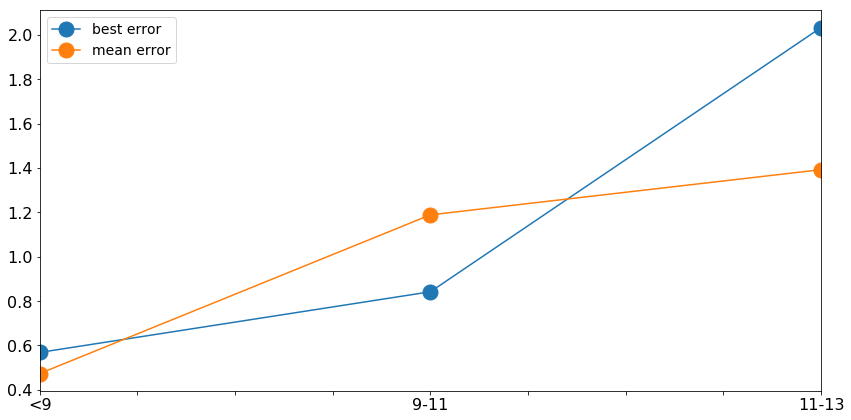

In [87]:
index = ['<9', '9-11', '11-13']
gra16 = pd.DataFrame({'mean error': mean9, 'best error': best9}, index=index)
ax = gra16.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 2 Ability

In [88]:
w2g9 = wom2[(wom2.query_pb <= 9)]
w2g11 = wom2[(wom2.query_pb > 9) & (wom2.query_pb <= 11)]
w2g13 = wom2[(wom2.query_pb > 11) & (wom2.query_pb <= 13)]
w2g15 = wom2[(wom2.query_pb > 13) & (wom2.query_pb <= 15)]
w2g17 = wom2[(wom2.query_pb > 15) & (wom2.query_pb <= 17)]
w2g19 = wom2[(wom2.query_pb > 17)]

### Bin counts

In [89]:
w2g9count = w2g9.shape[0]
w2g11count = w2g11.shape[0]
w2g13count = w2g13.shape[0]
w2g15count = w2g15.shape[0]
w2g17count = w2g17.shape[0]
w2g19count = w2g19.shape[0]

In [90]:
count6 = [w2g9count, w2g11count, w2g13count, w2g15count, w2g17count, w2g19count]

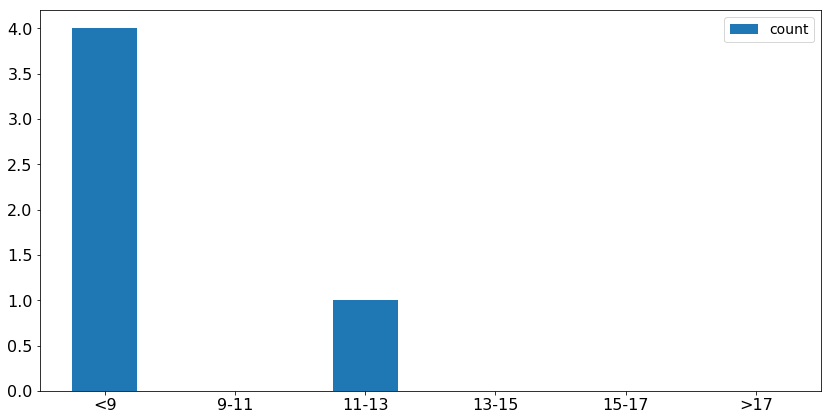

In [91]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count6}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [92]:
w2g9B = sqrt(mean_squared_error(w2g9.query_pb, w2g9.best_pb_prediction))
w2g9M = sqrt(mean_squared_error(w2g9.query_pb, w2g9.mean_pb_average_pace))

#w2g11B = sqrt(mean_squared_error(w2g11.query_pb, w2g11.best_pb_prediction))
#w2g11M = sqrt(mean_squared_error(w2g11.query_pb, w2g11.mean_pb_average_pace))

w2g13B = sqrt(mean_squared_error(w2g13.query_pb, w2g13.best_pb_prediction))
w2g13M = sqrt(mean_squared_error(w2g13.query_pb, w2g13.mean_pb_average_pace))

# w2g15B = sqrt(mean_squared_error(w2g15.query_pb, w2g15.best_pb_prediction))
# w2g15M = sqrt(mean_squared_error(w2g15.query_pb, w2g15.mean_pb_average_pace))

# w2g17B = sqrt(mean_squared_error(w2g17.query_pb, w2g17.best_pb_prediction))
# w2g17M = sqrt(mean_squared_error(w2g17.query_pb, w2g17.mean_pb_average_pace))

# w2g19B = sqrt(mean_squared_error(w2g19.query_pb, w2g19.best_pb_prediction))
# w2g19M = sqrt(mean_squared_error(w2g19.query_pb, w2g19.mean_pb_average_pace))


print('Wom2 U9 Best Error:', w2g9B)
print('Wom2 U9 Mean Error:', w2g9M)
#print('Wom2 9-11 Best Error:', w2g11B)
#print('Wom2 9-11 Mean Error:', w2g11M)
print('Wom2 11-13 Best Error:', w2g13B)
print('Wom2 11-13 Mean Error:', w2g13M)
# print('Wom2 13-15 Best Error:', w2g15B)
# print('Wom2 13-15 Mean Error:', w2g15M)
# print('Wom2 15-17 Best Error:', w2g17B)
# print('Wom2 15-17 Mean Error:', w2g17M)
# print('Wom2 O17 Best Error:', w2g19B)
# print('Wom2 017 Mean Error:', w2g19M)

Wom2 U9 Best Error: 0.6823728433557116
Wom2 U9 Mean Error: 0.33960590692105186
Wom2 11-13 Best Error: 2.659022716956674
Wom2 11-13 Mean Error: 2.376053956700355


In [93]:
mean10 = [w2g9M, w2g13M]
best10 = [w2g9B, w2g13B]

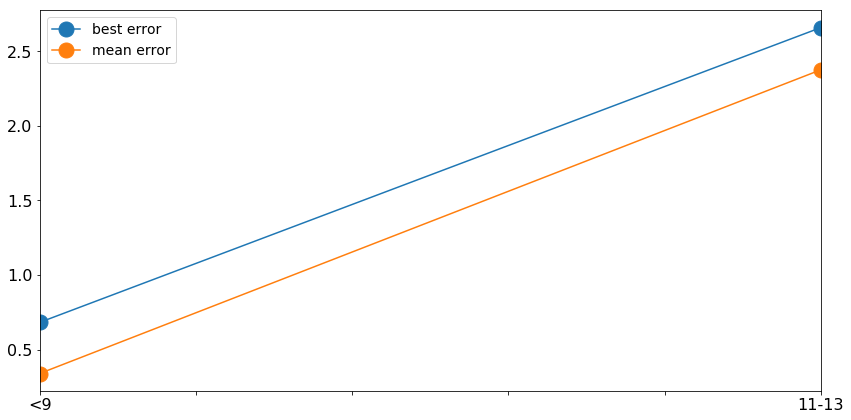

In [94]:
index = ['<9', '11-13']
gra18 = pd.DataFrame({'mean error': mean10, 'best error': best10}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Senior Women Ability

In [95]:
sw9 = senW[(senW.query_pb <= 9)]
sw11 = senW[(senW.query_pb > 9) & (senW.query_pb <= 11)]
sw13 = senW[(senW.query_pb > 11) & (senW.query_pb <= 13)]
sw15 = senW[(senW.query_pb > 13) & (senW.query_pb <= 15)]
sw17 = senW[(senW.query_pb > 15) & (senW.query_pb <= 17)]
sw19 = senW[(senW.query_pb > 17)]

### Bin counts

In [96]:
sw9count = sw9.shape[0]
sw11count = sw11.shape[0]
sw13count = sw13.shape[0]
sw15count = sw15.shape[0]
sw17count = sw17.shape[0]
sw19count = sw19.shape[0]

In [97]:
count7 = [sw9count, sw11count, sw13count, sw15count, sw17count, sw19count]

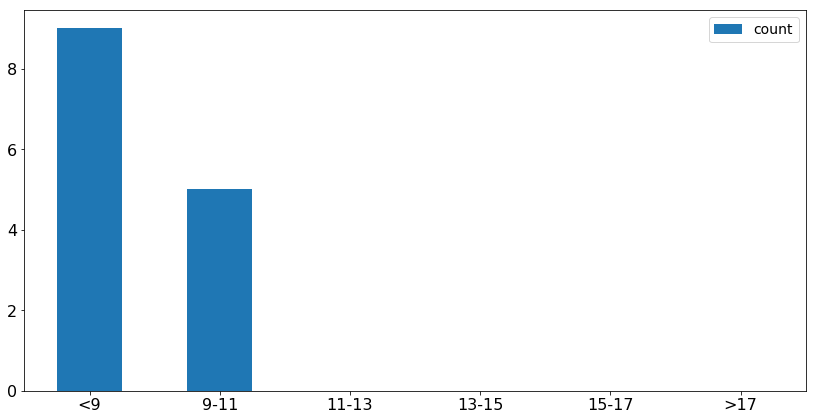

In [98]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count7}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [99]:

sw9B = sqrt(mean_squared_error(sw9.query_pb, sw9.best_pb_prediction))
sw9M = sqrt(mean_squared_error(sw9.query_pb, sw9.mean_pb_average_pace))

sw11B = sqrt(mean_squared_error(sw11.query_pb, sw11.best_pb_prediction))
sw11M = sqrt(mean_squared_error(sw11.query_pb, sw11.mean_pb_average_pace))

# sw13B = sqrt(mean_squared_error(sw13.query_pb, sw13.best_pb_prediction))
# sw13M = sqrt(mean_squared_error(sw13.query_pb, sw13.mean_pb_average_pace))

# sw15B = sqrt(mean_squared_error(sw15.query_pb, sw15.best_pb_prediction))
# sw15M = sqrt(mean_squared_error(sw15.query_pb, sw15.mean_pb_average_pace))

# sw17B = sqrt(mean_squared_error(sw17.query_pb, sw17.best_pb_prediction))
# sw17M = sqrt(mean_squared_error(sw17.query_pb, sw17.mean_pb_average_pace))

# sw19B = sqrt(mean_squared_error(sw19.query_pb, sw19.best_pb_prediction))
# sw19M = sqrt(mean_squared_error(sw19.query_pb, sw19.mean_pb_average_pace))


print('Senior Women U9 Best Error:', sw9B)
print('Senior Women U9 Mean Error:', sw9M)
print('Senior Women 9-11 Best Error:', sw11B)
print('Senior Women 9-11 Mean Error:', sw11M)
# print('Senior Women 11-13 Best Error:', sw13B)
# print('Senior Women 11-13 Mean Error:', sw13M)
# print('Senior Women 13-15 Best Error:', sw15B)
# print('Senior Women 13-15 Mean Error:', sw15M)
# print('Senior Women 15-17 Best Error:', sw17B)
# print('Senior Women 15-17 Mean Error:', sw17M)
# print('Senior Women O17 Best Error:', sw19B)
# print('Senior Women 017 Mean Error:', sw19M)

Senior Women U9 Best Error: 0.9154641989943967
Senior Women U9 Mean Error: 0.6198865278016442
Senior Women 9-11 Best Error: 0.7358392485052215
Senior Women 9-11 Mean Error: 1.0296675727272864


In [100]:
mean11 = [sw9M, sw11M]
best11 = [sw9B, sw11B]

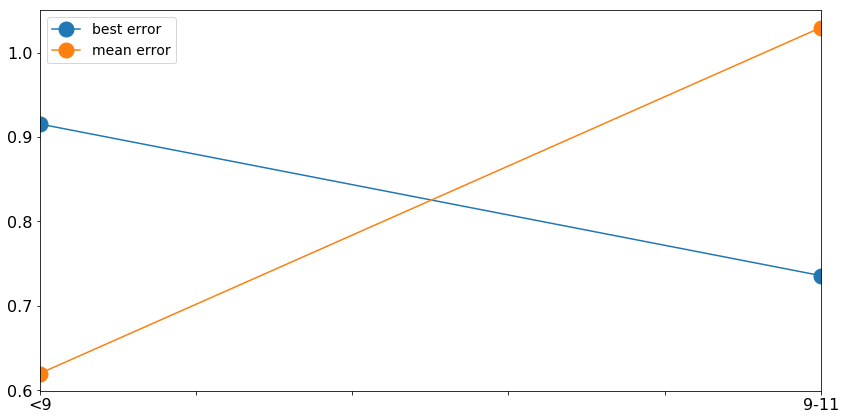

In [101]:
index = ['<9', '9-11']
gra18 = pd.DataFrame({'mean error': mean11, 'best error': best11}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Youth Men Ability

In [102]:
you9 = you[(you.query_pb <= 9)]
you11 = you[(you.query_pb > 9) & (you.query_pb <= 11)]
you13 = you[(you.query_pb > 11) & (you.query_pb <= 13)]
you15 = you[(you.query_pb > 13) & (you.query_pb <= 15)]
you17 = you[(you.query_pb > 15) & (you.query_pb <= 17)]
you19 = you[(you.query_pb > 17)]

### Bin counts

In [103]:
you9count = you9.shape[0]
you11count = you11.shape[0]
you13count = you13.shape[0]
you15count = you15.shape[0]
you17count = you17.shape[0]
you19count = you19.shape[0]

In [104]:
count8 = [you9count, you11count, you13count, you15count, you17count, you19count]

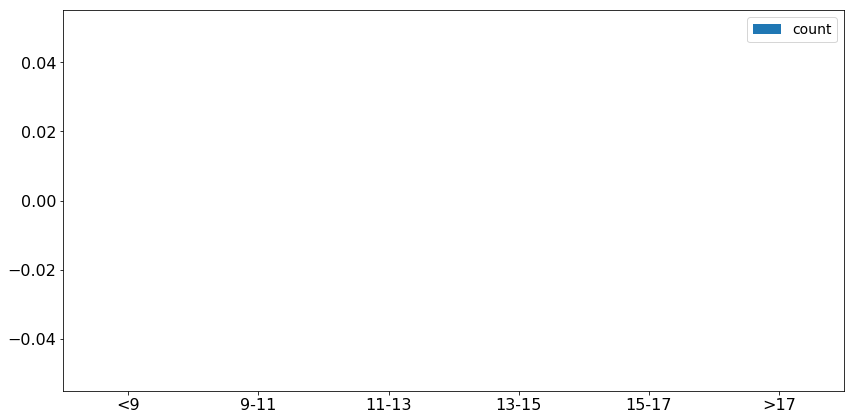

In [105]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count8}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

# Age Ability

In [106]:
frames = [sg9, sw9]
frames1 = [sg11, sw11]
frames2 = [sg13, sw13]
frames3 = [sg15, sw15]
frames4 = [sg17, sw17]
frames5 = [sg19, sw19]

## 23-39 year old Ability

In [107]:
ageS9 = pd.concat(frames)
ageS11 = pd.concat(frames1)
ageS13 = pd.concat(frames2)
ageS15 = pd.concat(frames3)
ageS17 = pd.concat(frames4)
ageS19 = pd.concat(frames5)

### Bin counts

In [108]:
ageS9count = ageS9.shape[0]
ageS11count = ageS11.shape[0]
ageS13count = ageS13.shape[0]
ageS15count = ageS15.shape[0]
ageS17count = ageS17.shape[0]
ageS19count = ageS19.shape[0]

In [109]:
count_age = [ageS9count, ageS11count, ageS13count, ageS15count, ageS17count, ageS19count]

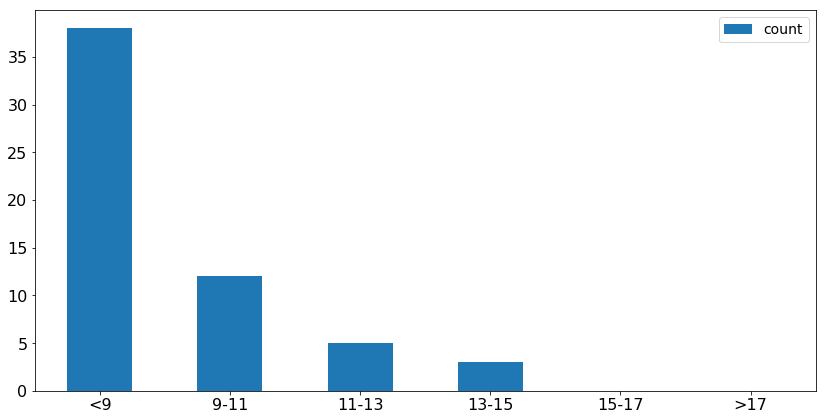

In [110]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count_age}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [111]:

ageS9B = sqrt(mean_squared_error(ageS9.query_pb, ageS9.best_pb_prediction))
ageS9M = sqrt(mean_squared_error(ageS9.query_pb, ageS9.mean_pb_average_pace))

ageS11B = sqrt(mean_squared_error(ageS11.query_pb, ageS11.best_pb_prediction))
ageS11M = sqrt(mean_squared_error(ageS11.query_pb, ageS11.mean_pb_average_pace))

ageS13B = sqrt(mean_squared_error(ageS13.query_pb, ageS13.best_pb_prediction))
ageS13M = sqrt(mean_squared_error(ageS13.query_pb, ageS13.mean_pb_average_pace))

ageS15B = sqrt(mean_squared_error(ageS15.query_pb, ageS15.best_pb_prediction))
ageS15M = sqrt(mean_squared_error(ageS15.query_pb, ageS15.mean_pb_average_pace))

# ageS17B = sqrt(mean_squared_error(ageS17.query_pb, ageS17.best_pb_prediction))
# ageS17M = sqrt(mean_squared_error(ageS17.query_pb, ageS17.mean_pb_average_pace))

# ageS19B = sqrt(mean_squared_error(ageS19.query_pb, ageS19.best_pb_prediction))
# ageS19M = sqrt(mean_squared_error(ageS19.query_pb, ageS19.mean_pb_average_pace))


print('Aged 23-39 U9 Best Error:', ageS9B)
print('Aged 23-39 U9 Mean Error:', ageS9M)
print('Aged 23-39 9-11 Best Error:', ageS11B)
print('Aged 23-39 9-11 Mean Error:', ageS11M)
print('Aged 23-39 11-13 Best Error:', ageS13B)
print('Aged 23-39 11-13 Mean Error:', ageS13M)
print('Aged 23-39 13-15 Best Error:', ageS15B)
print('Aged 23-39 13-15 Mean Error:', ageS15M)
# print('Aged 23-39 15-17 Best Error:', ageS17B)
# print('Aged 23-39 15-17 Mean Error:', ageS17M)
# print('Aged 23-39 O17 Best Error:', ageS19B)
# print('Aged 23-39 017 Mean Error:', ageS19M)

Aged 23-39 U9 Best Error: 0.9555722766364517
Aged 23-39 U9 Mean Error: 1.0451768803821506
Aged 23-39 9-11 Best Error: 1.2315453015167683
Aged 23-39 9-11 Mean Error: 0.9684092688678008
Aged 23-39 11-13 Best Error: 1.3877955744184824
Aged 23-39 11-13 Mean Error: 0.6206565404938119
Aged 23-39 13-15 Best Error: 2.814414469435903
Aged 23-39 13-15 Mean Error: 1.4951672462041166


In [112]:
mean_age = [ageS9M, ageS11M, ageS13M, ageS15M]
best_age = [ageS9B, ageS11B, ageS13B, ageS15B]

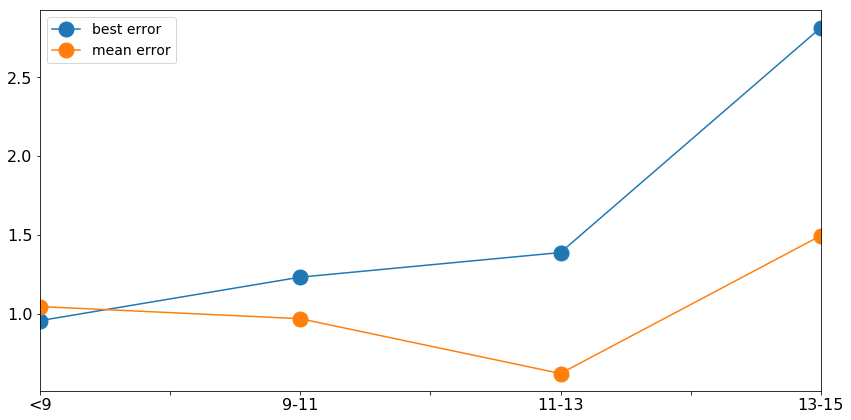

In [113]:
index = ['<9', '9-11', '11-13', '13-15']
ag = pd.DataFrame({'mean error': mean_age, 'best error': best_age}, index=index)
ax = ag.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# AGE

In [114]:
g23 = [sen, senW]
g40 = [mas, wom1]
g50 = [mas2, wom2]
g60 = mas3
g20 = you

In [115]:
g23 = pd.concat(g23)
g40 = pd.concat(g40)
g50 = pd.concat(g50)

In [116]:
g23count = g23.shape[0]
g40count = g40.shape[0]
g50count = g50.shape[0]
g60count = g60.shape[0]
g20count = g20.shape[0]

In [117]:
count_G = [g20count, g23count, g40count, g50count, g60count]

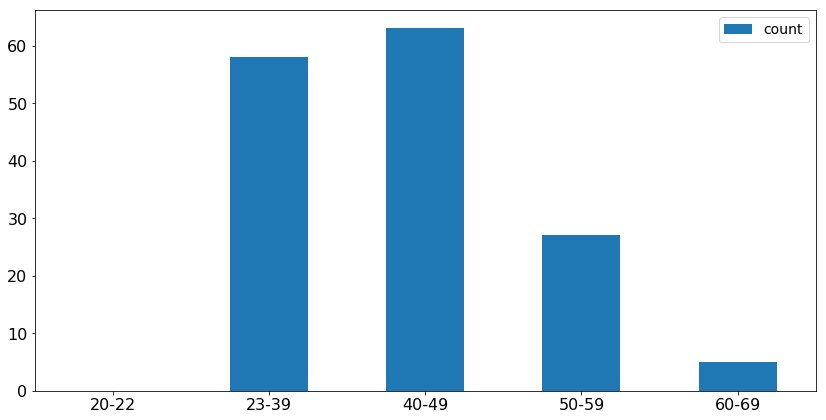

In [118]:
index = ['20-22', '23-39', '40-49', '50-59', '60-69']
ct = pd.DataFrame({'count': count_G}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [119]:
g23B = sqrt(mean_squared_error(g23.query_pb, g23.best_pb_prediction))
g23M = sqrt(mean_squared_error(g23.query_pb, g23.mean_pb_average_pace))

g40B = sqrt(mean_squared_error(g40.query_pb, g40.best_pb_prediction))
g40M = sqrt(mean_squared_error(g40.query_pb, g40.mean_pb_average_pace))

g50B = sqrt(mean_squared_error(g50.query_pb, g50.best_pb_prediction))
g50M = sqrt(mean_squared_error(g50.query_pb, g50.mean_pb_average_pace))

g60B = sqrt(mean_squared_error(g60.query_pb, g60.best_pb_prediction))
g60M = sqrt(mean_squared_error(g60.query_pb, g60.mean_pb_average_pace))


print('23-39 Best Error:', g23B)
print('23-39 Mean Error:', g23M)
print('40-49 Best Error:', g40B)
print('40-49 Mean Error:', g40M)
print('50-59 Best Error:', g50B)
print('50-59 Mean Error:', g50M)
print('60-69 Best Error:', g60B)
print('60-69 Mean Error:', g60M)

23-39 Best Error: 1.2197485144893385
23-39 Mean Error: 1.0288715375213204
40-49 Best Error: 1.4402771555145848
40-49 Mean Error: 1.0210922672444267
50-59 Best Error: 1.9357616103876805
50-59 Mean Error: 1.3876919110635262
60-69 Best Error: 1.794067943786769
60-69 Mean Error: 1.0791883161035585


In [120]:
mean_A = [g23M, g40M, g50M, g60M]
best_A = [g23B, g40B, g50B, g60B]

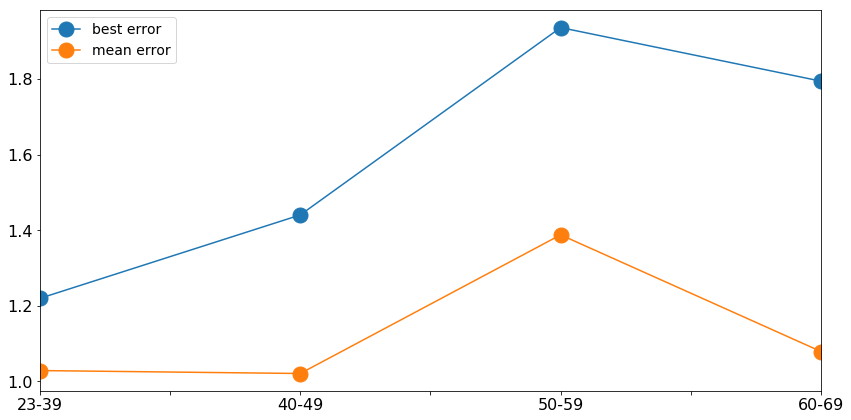

In [121]:
index = ['23-39', '40-49', '50-59', '60-69']
ageG = pd.DataFrame({'mean error': mean_A, 'best error': best_A}, index=index)
ax = ageG.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)